# Analysis of Fandango Movie Ratings

An article from [FiveThirtyEight]() shows that Fandango rating system is strongly skewed with relatively higher ratings than other websites and a marked tendency to round up all user ratings in order to present higher ratings.

The staff at the website reported that this was due to a bug in their system and not intentional bias. Assuming this fix has taken place, this project is aimed at analyzing any changes in the rating system. We will use a later [dataset](https://github.com/mircealex/Movie_ratings_2016_17) of the website to compare.

In [39]:
import pandas as pd
from numpy import arange
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [26]:
fandango_comp = pd.read_csv("fandango_score_comparison.csv")
later_ratings = pd.read_csv("movie_ratings_16_17.csv")

In [27]:
fandango_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [28]:
later_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [29]:
fandango_2015 = fandango_comp[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango16_17 = later_ratings[['movie', 'year', 'fandango']].copy()

In [30]:
fandango_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [31]:
fandango16_17.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Taking a look at the article in question, we see that their analysis was based on movies that were reviewed on 3 other review sites and had at least 30 fan reviews on fandango. Our second dataset containing movies from 2016 and 2017 focuses on the most popular movie entries into fandango, this is based on the number of votes or reviews.

As such, our sample for this analysis is not representative of the entire fandango rating system as it only targets "popular" movies with the hypothesis that ratings are skewed in order to influence ticket sales. This sampling method is more purposive than random,

## Changing the Goal of our Analysis

Our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

In [32]:
fandango_2015["Year"] = fandango_2015["FILM"].str[-5:-1]
fandango_2015["Year"].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [33]:
fandango16_17["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [35]:
fandango_2015 = fandango_2015[fandango_2015["Year"] == "2015"]
fandango_2016 = fandango16_17[fandango16_17["year"] == 2016]

As both datasets were focused on popular movies, we need to also focus on the years 2015 and 2016 so as to make them representative for our analysis

## Comparing Distribution Shapes for 2015 and 2016

Our aim is to figure out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. One way to go about is to analyze and compare the distributions of movie ratings for the two samples.

In [38]:
print(plt.style.available)

['seaborn-whitegrid', 'dark_background', 'seaborn-bright', 'seaborn-notebook', 'classic', 'seaborn-muted', 'grayscale', 'seaborn-dark-palette', 'seaborn-talk', 'seaborn-pastel', 'seaborn-paper', 'seaborn-deep', 'ggplot', 'seaborn-darkgrid', 'seaborn-colorblind', 'bmh', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-poster', 'seaborn-white', 'seaborn-dark']


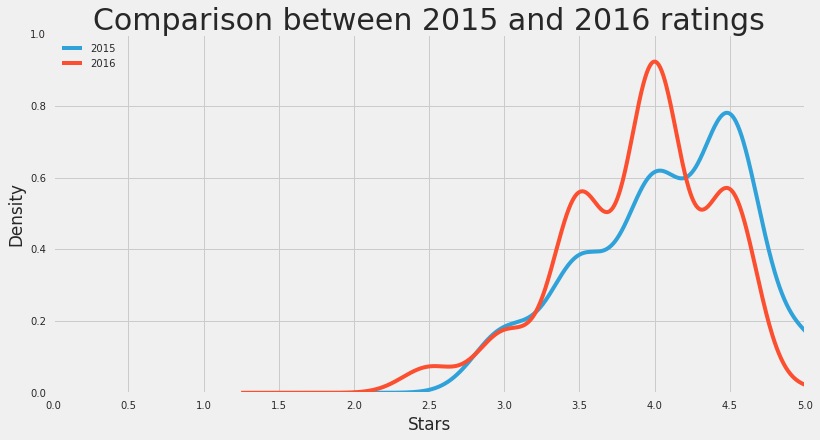

In [44]:
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label="2015", legend=True, figsize= (12,6))
fandango_2016["fandango"].plot.kde(label="2016", legend=True)

plt.title("Comparison between 2015 and 2016 ratings", fontsize=30)
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.legend(loc=2)
plt.show()

Both rating datasets show high ratings with distributions that are negatively skewed, with most of the movies being rated within the 3.5-5.0 range.
However, we can see that there are differences between them with the 2016 dataset having relatively lower scores than the 2015 dataset

## Comparing Relative Frequencies

In [47]:
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [48]:
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

## Determining the Direction of the Change

In [49]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

In [50]:
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


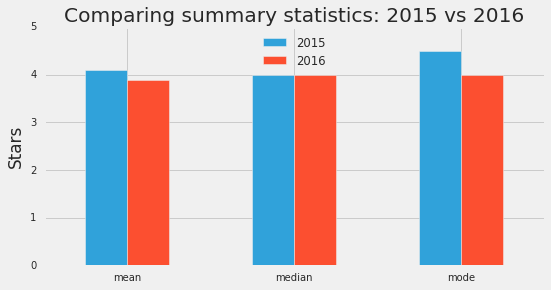

In [54]:
plt.style.use('fivethirtyeight')
summary.plot.bar(rot=0, figsize=(8,4))
plt.title('Comparing summary statistics: 2015 vs 2016')
plt.ylabel('Stars')
plt.ylim(0,5)
plt.legend(loc='upper center', framealpha=0.1, fontsize='small');

The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015.
While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.
    

## Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.